In [1]:
import pandas as pd
from ETL import ETL
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('dataset/flights.csv')

In [3]:
len(df)

119271

In [3]:
df = ETL(df)

## Data Visualization

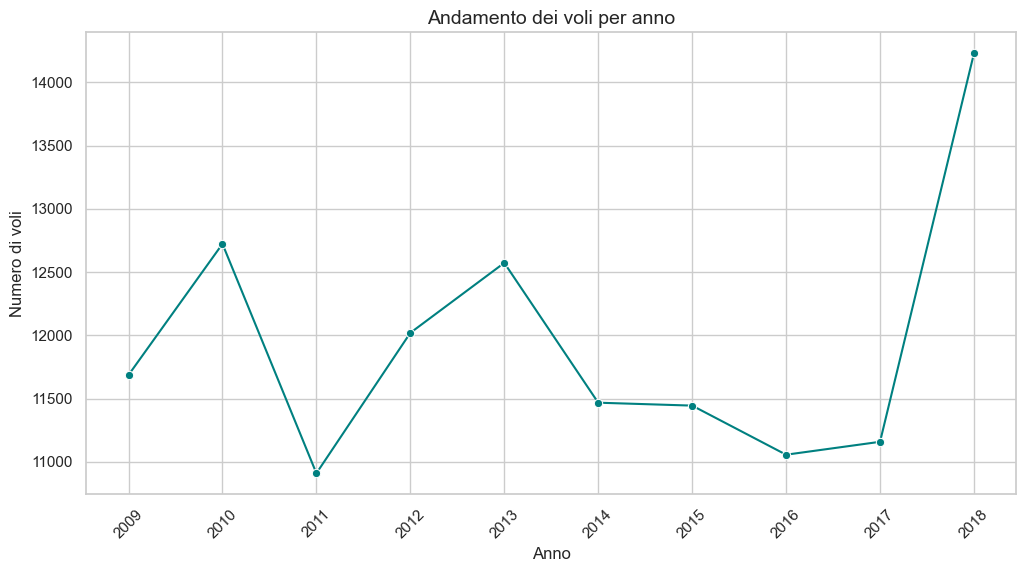

,FL_YEAR,Voli
0,2009,11687
1,2010,12723
2,2011,10910
3,2012,12020
4,2013,12573
5,2014,11468
6,2015,11445
7,2016,11057
8,2017,11159
9,2018,14229


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Raggruppamento dei dati
voli_anni = df.groupby('FL_YEAR').size().reset_index(name='Voli')

# Impostazione del tema di Seaborn
sns.set_theme(style="whitegrid")

# Creazione del grafico a linee
plt.figure(figsize=(12, 6))
sns.lineplot(x='FL_YEAR', y='Voli', data=voli_anni, marker='o', color='teal')

# Impostare tutti gli anni sull'asse X
plt.xticks(voli_anni['FL_YEAR'], rotation=45)  # Ruota le etichette per maggiore leggibilità

# Etichette e titolo
plt.xlabel('Anno', fontsize=12)
plt.ylabel('Numero di voli', fontsize=12)
plt.title('Andamento dei voli per anno', fontsize=14)

# Mostra il grafico
plt.show()


C:\Users\dswal\AppData\Local\Temp\ipykernel_1916\4147128470.py:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  carrier_punctuality = df.groupby(['OP_CARRIER', 'Puntualità']).size().unstack(fill_value=0)


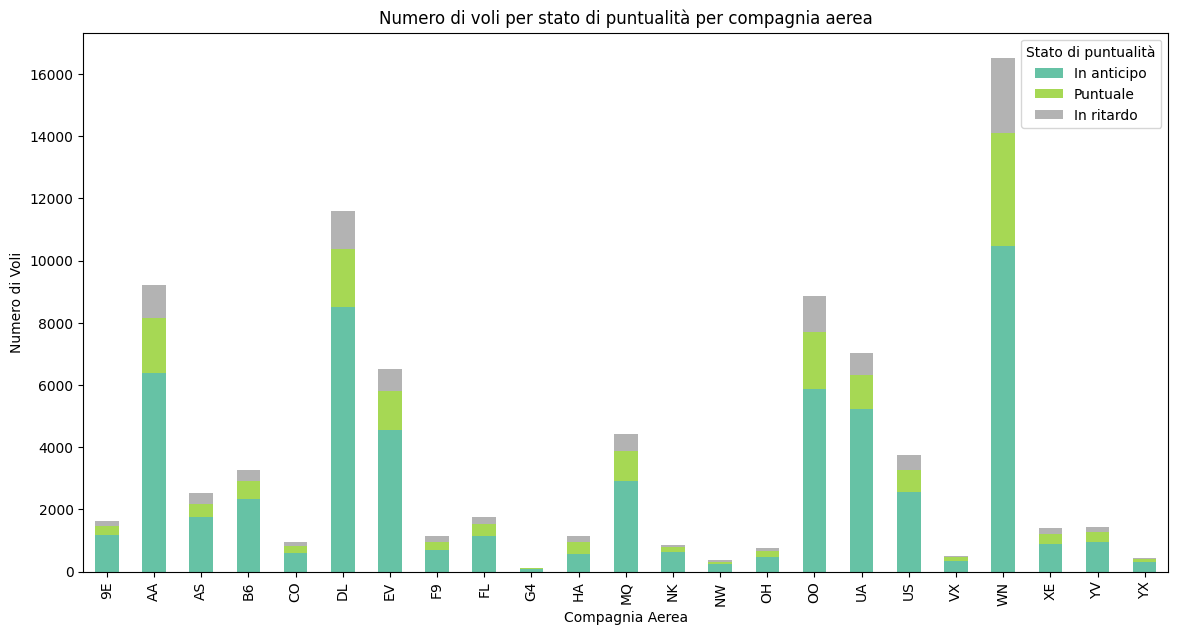

In [8]:
# Definire i voli puntuali, in ritardo e in anticipo
df['Puntualità'] = pd.cut(df['ARR_DELAY'],
                          bins=[-float('inf'), -5, 0, +5],
                          labels=['In anticipo', 'Puntuale', 'In ritardo'])

# Raggruppare per compagnia aerea e tipo di puntualità, contando il numero di voli
carrier_punctuality = df.groupby(['OP_CARRIER', 'Puntualità']).size().unstack(fill_value=0)

# Creare un grafico a barre impilate
carrier_punctuality.plot(kind='bar', stacked=True, figsize=(14, 7), colormap='Set2')

# Impostare il titolo e le etichette
plt.title('Numero di voli per stato di puntualità per compagnia aerea')
plt.xlabel('Compagnia Aerea')
plt.ylabel('Numero di Voli')
plt.xticks(rotation=90)
plt.legend(title='Stato di puntualità', labels=['In anticipo', 'Puntuale', 'In ritardo', 'In ritardo estremo'])
plt.show()


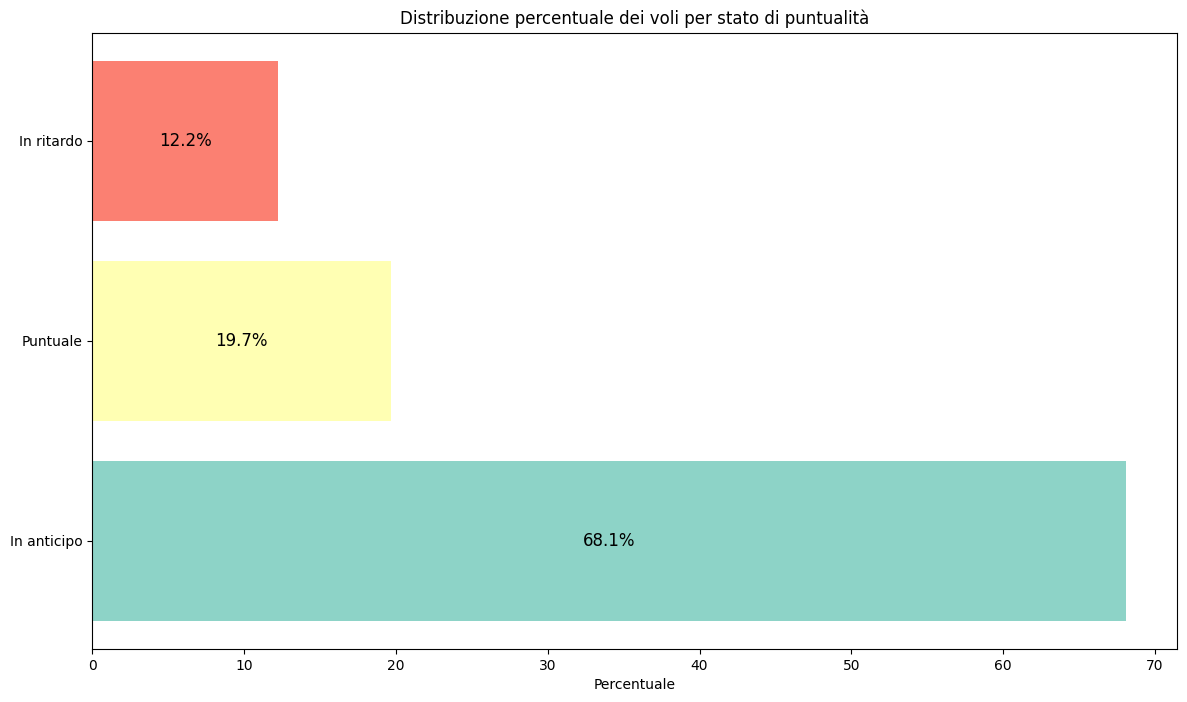

In [57]:
# Calcolare le percentuali per ogni stato di puntualità
puntuality_distribution = df['Puntualità'].value_counts(normalize=True) * 100

fig, ax = plt.subplots(figsize=(14, 8))
bars = ax.barh(puntuality_distribution.index, puntuality_distribution, color=['#8dd3c7', '#ffffb3', '#fb8072'])

# Aggiungi le etichette con le percentuali
for bar in bars:
    width = bar.get_width()  # Lunghezza della barra (percentuale)
    ax.text(width / 2, bar.get_y() + bar.get_height() / 2, f'{width:.1f}%', va='center', ha='center', fontsize=12,  color='black')

ax.set_title('Distribuzione percentuale dei voli per stato di puntualità')
ax.set_xlabel('Percentuale')
plt.show()


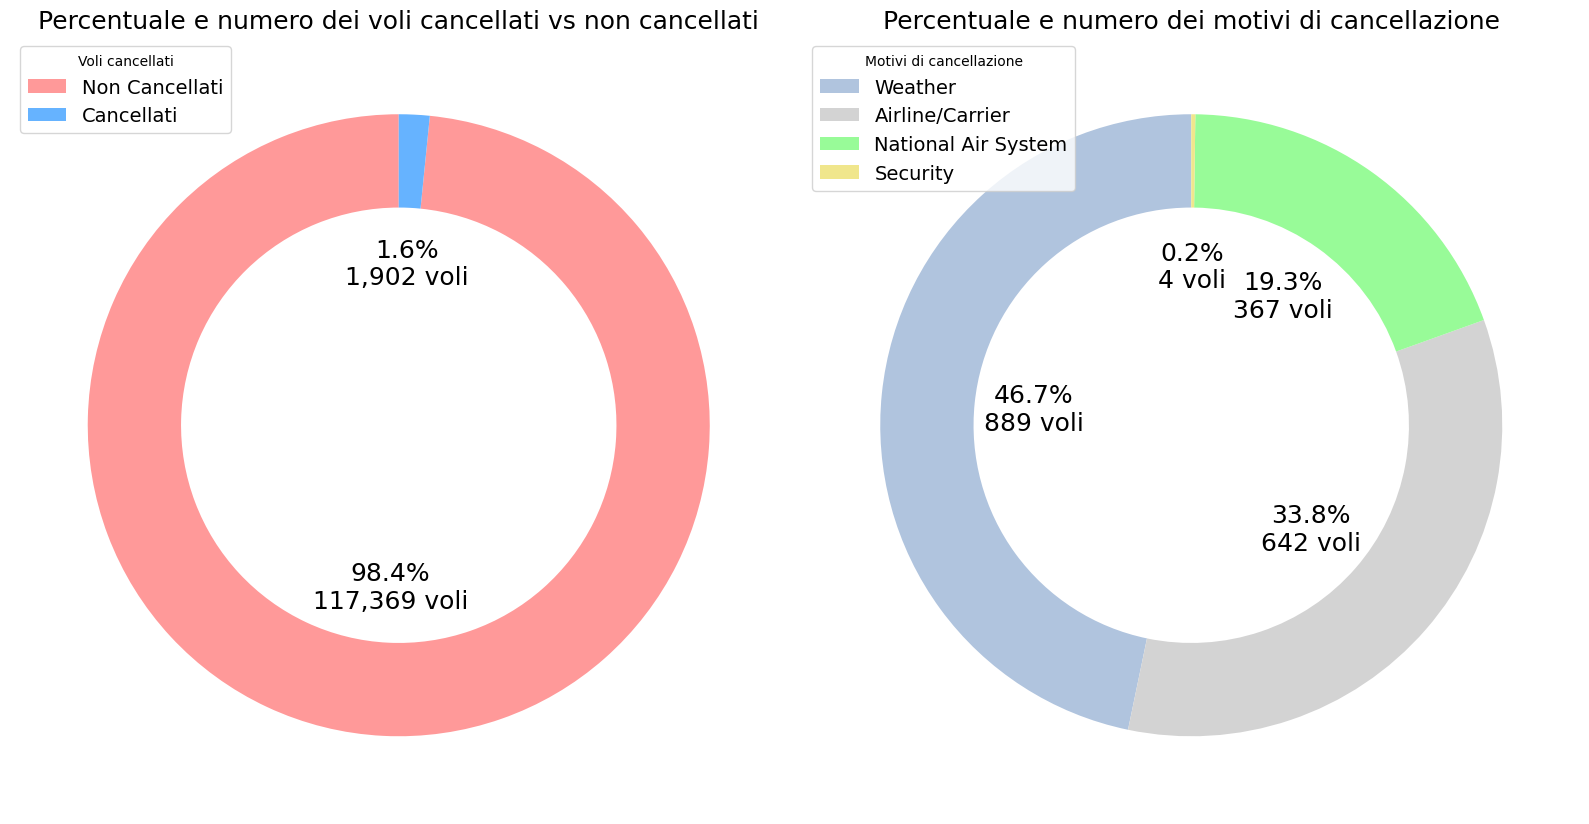

In [82]:
# Conta i valori unici nella colonna 'CANCELLED' (0 e 1)
cancellati = df['CANCELLED'].value_counts()

# Filtra i voli cancellati, escludendo quelli con motivo 'Not cancelled' (valore 0)
motivi_cancellazione = df[df['CANCELLED'] == 1]['C_REASON'].value_counts()

# Crea una figura con tre sottotrame affiancate
fig, (ax2, ax3) = plt.subplots(1, 2, figsize=(16, 16))  # 1 riga, 3 colonne

def func(pct, allvals):
    absolute = round(pct / 100.*sum(allvals))
    return f"{pct:.1f}%\n{absolute:,} voli"

# Grafico ad anello per i voli cancellati vs non cancellati
colors = ['#ff9999', '#66b3ff']
ax2.pie(cancellati, autopct=lambda pct: func(pct, cancellati), startangle=90, colors=colors, 
        textprops={'fontsize': 18}, wedgeprops={'width': 0.3}, pctdistance=0.52)  # Imposta larghezza per l'anello
ax2.set_title('Percentuale e numero dei voli cancellati vs non cancellati', fontsize=18)


# Grafico ad anello per i motivi di cancellazione
# Grafico ad anello per i motivi di cancellazione
colors_motivi = ['#B0C4DE', '#D3D3D3', '#98FB98', '#F0E68C']  # Blu chiaro, grigio, verde chiaro, giallo chiaro
ax3.pie(motivi_cancellazione,  autopct=lambda pct: func(pct, motivi_cancellazione), startangle=90, colors=colors_motivi, 
        textprops={'fontsize': 18}, wedgeprops={'width': 0.3}, pctdistance=0.51)  # Imposta larghezza per l'anello
ax3.set_title('Percentuale e numero dei motivi di cancellazione', fontsize=18)

# Aggiungi le legende in alto a sinistra
ax2.legend(['Non Cancellati', 'Cancellati'], title="Voli cancellati", loc='upper left', fontsize=14)
ax3.legend(motivi_cancellazione.index, title="Motivi di cancellazione", loc='upper left', fontsize=14)

# Mostra il grafico
plt.tight_layout()  # Ottimizza il layout per evitare sovrapposizioni
plt.show()


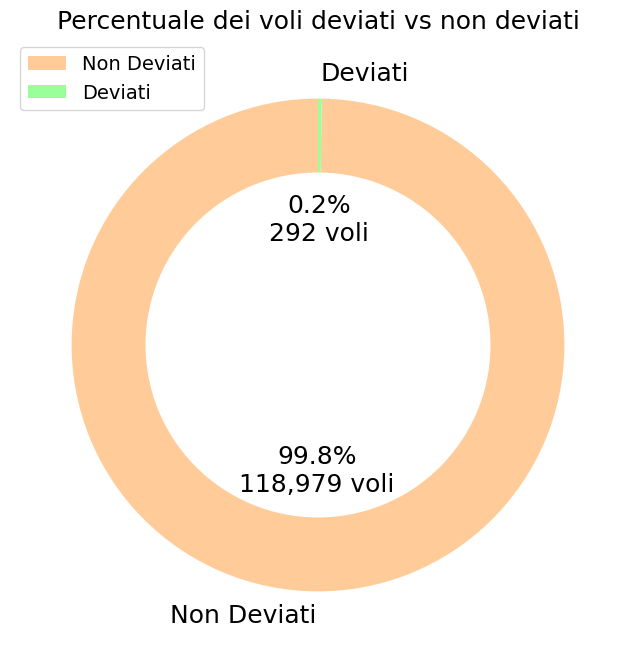

In [84]:
# Conta i valori unici nella colonna 'DIVERTED' (0 e 1)
diverted = df['DIVERTED'].value_counts()

# Crea una figura
fig, ax1 = plt.subplots(figsize=(8, 8))  # 1 grafico

# Colori per 'diverted' e 'non diverted'
colors_diverted = ['#ffcc99', '#99ff99']

# Grafico ad anello per i voli deviati vs non deviati
ax1.pie(diverted, labels=['Non Deviati', 'Deviati'], autopct=lambda pct: func(pct, diverted), startangle=90, 
        colors=colors_diverted, textprops={'fontsize': 18}, wedgeprops={'width': 0.3}, pctdistance=0.51)  # Imposta larghezza per l'anello

# Titolo del grafico
ax1.set_title('Percentuale dei voli deviati vs non deviati', fontsize=18)

# Aggiungi la leggenda
ax1.legend(['Non Deviati', 'Deviati'], loc='upper left', fontsize=14)

# Mostra il grafico
plt.show()


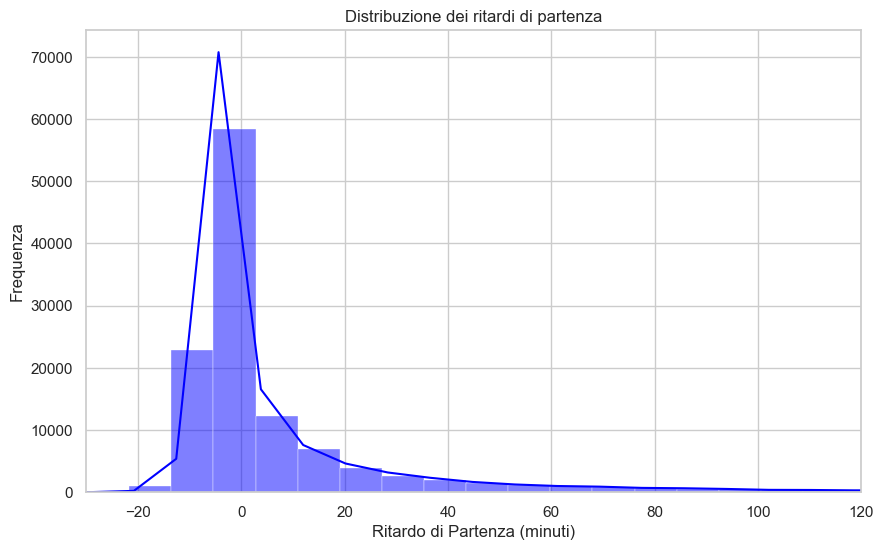

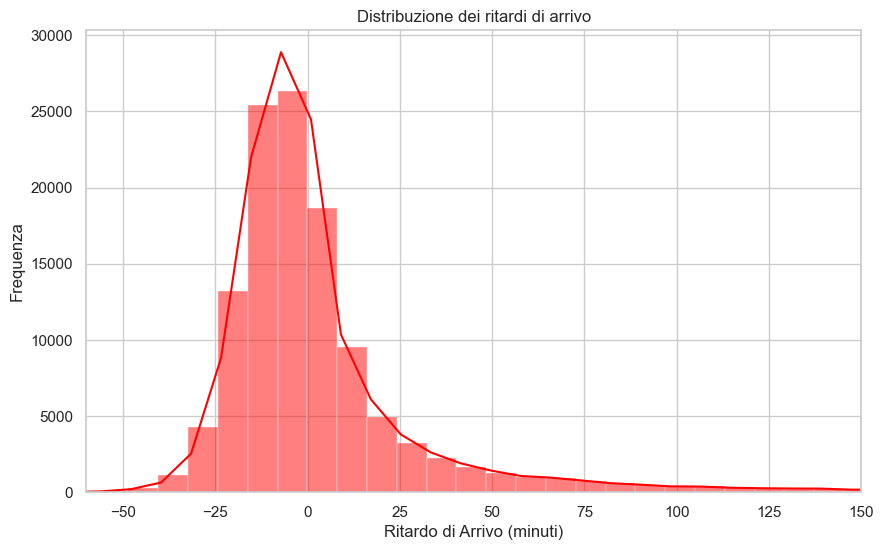

In [95]:
# Distribuzione dei ritardi di partenza
plt.figure(figsize=(10, 6))
sns.histplot(df['DEP_DELAY'], bins=200, kde=True, color='blue', kde_kws={'bw_adjust': 0.3})
plt.title('Distribuzione dei ritardi di partenza')
plt.xlabel('Ritardo di Partenza (minuti)')
plt.ylabel('Frequenza')
plt.xlim(-30, 120)  # Limitare l'asse x per concentrarsi sui valori centrali
plt.show()

# Distribuzione dei ritardi di arrivo
plt.figure(figsize=(10, 6))
sns.histplot(df['ARR_DELAY'], bins=200, kde=True, color='red', kde_kws={'bw_adjust': 0.3})
plt.title('Distribuzione dei ritardi di arrivo')
plt.xlabel('Ritardo di Arrivo (minuti)')
plt.ylabel('Frequenza')
plt.xlim(-60, 150)  # Limitare l'asse x per concentrarsi sui valori centrali
plt.show()


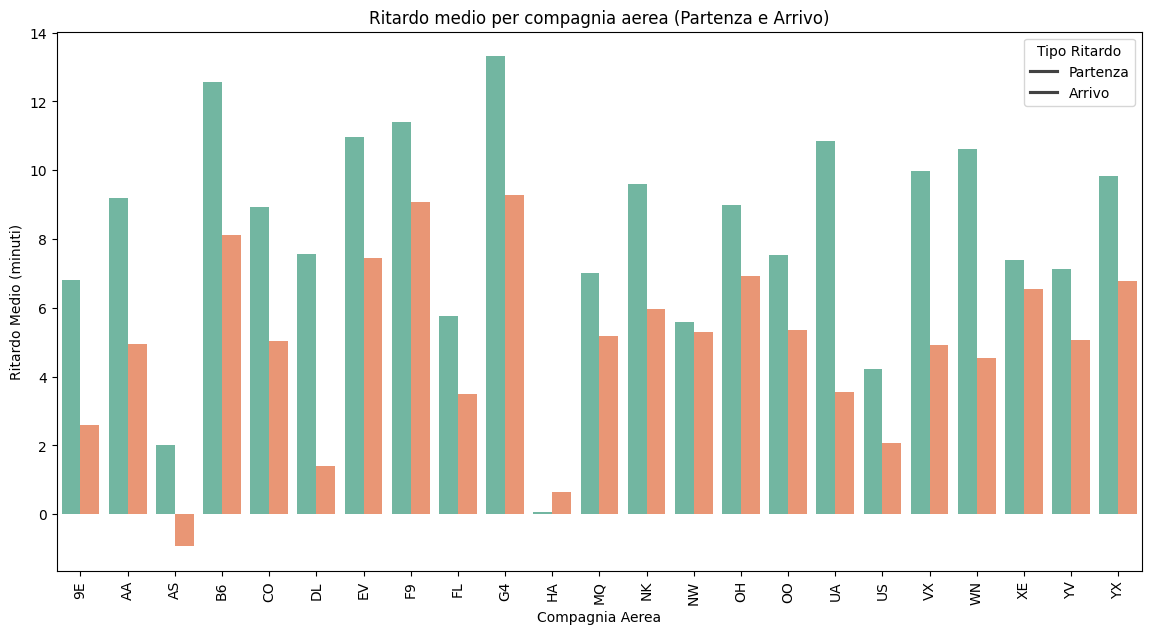

In [18]:
# Calcolo dei ritardi medi per compagnia aerea (sia in partenza che in arrivo)
carrier_delays = df.groupby('OP_CARRIER').agg({
    'DEP_DELAY': 'mean',  # Media dei ritardi di partenza
    'ARR_DELAY': 'mean'   # Media dei ritardi di arrivo
}).reset_index()

# Ristruttura i dati per facilitare la visualizzazione con un grafico a barre raggruppato
carrier_delays_melted = carrier_delays.melt(id_vars='OP_CARRIER', 
                                            value_vars=['DEP_DELAY', 'ARR_DELAY'], 
                                            var_name='Tipo Ritardo', 
                                            value_name='Ritardo Medio')

# Visualizzazione combinata con palette Set2
plt.figure(figsize=(14, 7))
sns.barplot(x='OP_CARRIER', y='Ritardo Medio', hue='Tipo Ritardo', data=carrier_delays_melted, palette='Set2')
plt.title('Ritardo medio per compagnia aerea (Partenza e Arrivo)')
plt.xlabel('Compagnia Aerea')
plt.ylabel('Ritardo Medio (minuti)')
plt.xticks(rotation=90)
plt.legend(title='Tipo Ritardo', labels=['Partenza', 'Arrivo'])
plt.show()


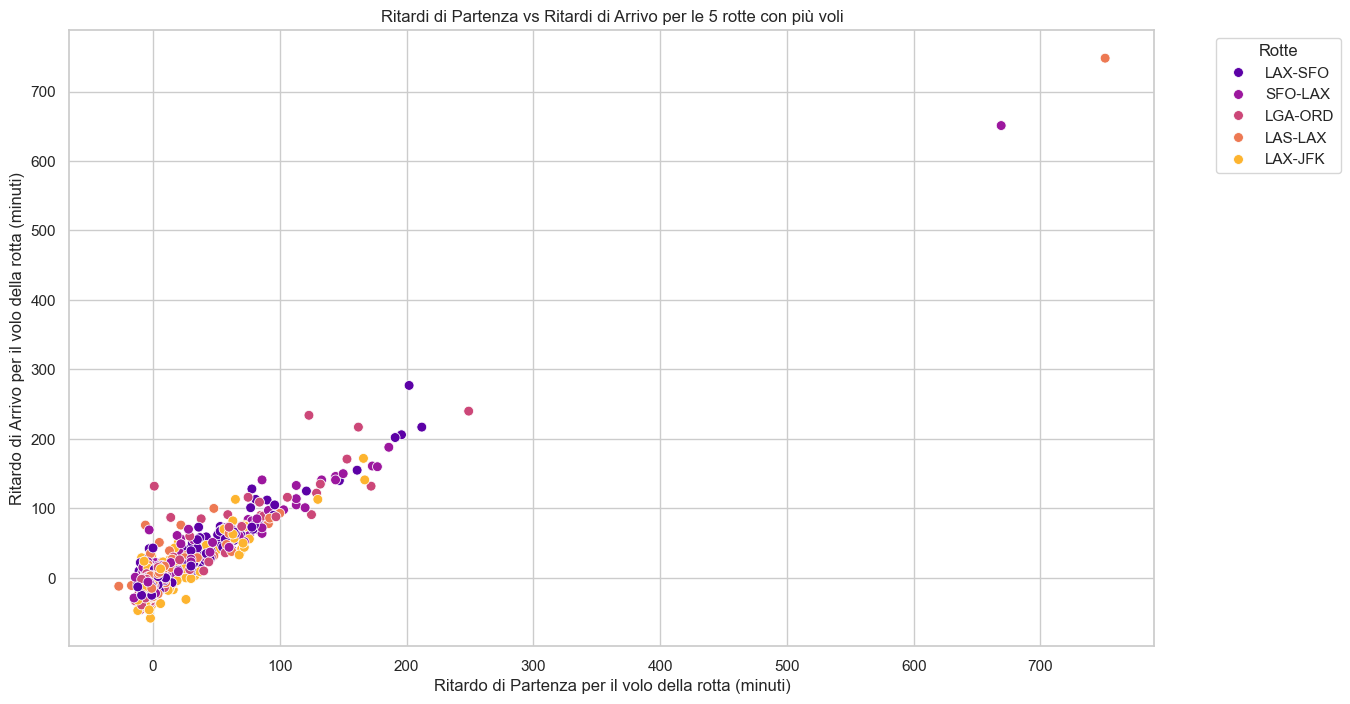

In [12]:
# Calcolo delle rotte tra aeroporti con conteggio dei voli
airport_routes = df.groupby(['ORIGIN', 'DEST']).size().reset_index(name='num_flights')

# Seleziona le prime 20 rotte con più voli
top_airports_routes_by_flights = airport_routes.nlargest(5, 'num_flights')

# Filtra i dati originali per ottenere solo i voli delle prime 20 rotte
airport_delays_routes_top = df.merge(top_airports_routes_by_flights, on=['ORIGIN', 'DEST'])

# Crea una nuova colonna per combinare ORIGIN e DEST in un unico identificatore di rotta
airport_delays_routes_top['route'] = airport_delays_routes_top['ORIGIN'] + '-' + airport_delays_routes_top['DEST']

# Visualizzazione dei ritardi di partenza vs ritardi di arrivo per le prime 20 rotte
plt.figure(figsize=(14, 8))
sns.scatterplot(x='DEP_DELAY', y='ARR_DELAY', data=airport_delays_routes_top, hue='route', palette='plasma', s=50)
plt.title('Ritardi di Partenza vs Ritardi di Arrivo per le 5 rotte con più voli')
plt.xlabel('Ritardo di Partenza per il volo della rotta (minuti)')
plt.ylabel('Ritardo di Arrivo per il volo della rotta (minuti)')
plt.legend(title='Rotte', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()